In [1]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

print('Complete')

Complete


In [2]:
sb_raw = pd.read_csv("/kaggle/input/starbucks-customer-retention-malaysia-survey/Starbucks satisfactory survey.csv")

sb_raw.head()

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,...,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [3]:
sb_raw.count()

Timestamp                                                                                                                 122
1. Your Gender                                                                                                            122
2. Your Age                                                                                                               122
3. Are you currently....?                                                                                                 122
4. What is your annual income?                                                                                            122
5. How often do you visit Starbucks?                                                                                      122
6. How do you usually enjoy Starbucks?                                                                                    121
7. How much time do you normally  spend during your visit?                                                            

In [4]:
sb_data = sb_raw.copy()

print('Complete')

Complete


In [5]:
sb_data.drop(columns=['Timestamp'], inplace = True)

print('Complete')

Complete


In [6]:
#rename column

sb_data.rename({"1. Your Gender": 'gender',
                                "2. Your Age": "age",
                                "3. Are you currently....?":"status",
                                "4. What is your annual income?":"income",
                                "5. How often do you visit Starbucks?":"visit",
                                "6. How do you usually enjoy Starbucks?":"howEnjoy",
                                "7. How much time do you normally  spend during your visit?":"timeSpend",
                                "8. The nearest Starbucks's outlet to you is...?":"location",
                                "9. Do you have Starbucks membership card?":"membership",
                                "10. What do you most frequently purchase at Starbucks?":"purchaseOften",
                                "11. On average, how much would you spend at Starbucks per visit?":"moneySpend",
                                "12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:":"rateQuality",
                                "13. How would you rate the price range at Starbucks?":"ratePrice",
                                "14. How important are sales and promotions in your purchase decision?":"rateSalesPromo",
                                "15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)":"rateAmbience",
                                "16. You rate the WiFi quality at Starbucks as..":"rateWifi",
                                "17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)":"rateService",
                                "18. How likely you will choose Starbucks for doing business meetings or hangout with friends?":"rateComing",
                                "19. How do you come to hear of promotions at Starbucks? Check all that apply.":"howComing",
                                "20. Will you continue buying at Starbucks?":"buyAgain",
                                 }, inplace = True , axis = 1)

sb_data.head()

,gender,age,status,income,visit,howEnjoy,timeSpend,location,membership,purchaseOften,moneySpend,rateQuality,ratePrice,rateSalesPromo,rateAmbience,rateWifi,rateService,rateComing,howComing,buyAgain
0,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


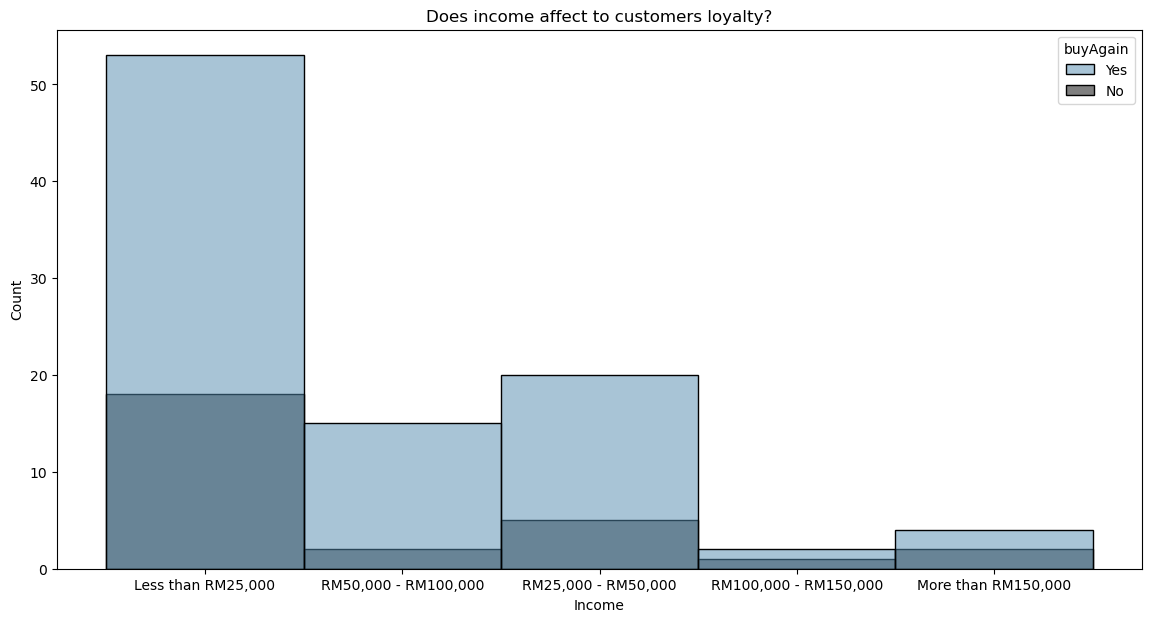

In [7]:
plt.figure(figsize=(14,7))

colors = ["#528AAE", "#000000"]

sns.histplot(data=sb_data, x='income', hue='buyAgain', palette=colors, alpha=0.5)

plt.title("Does income affect to customers loyalty?")
plt.xlabel("Income")
plt.ylabel("Count")

plt.show()

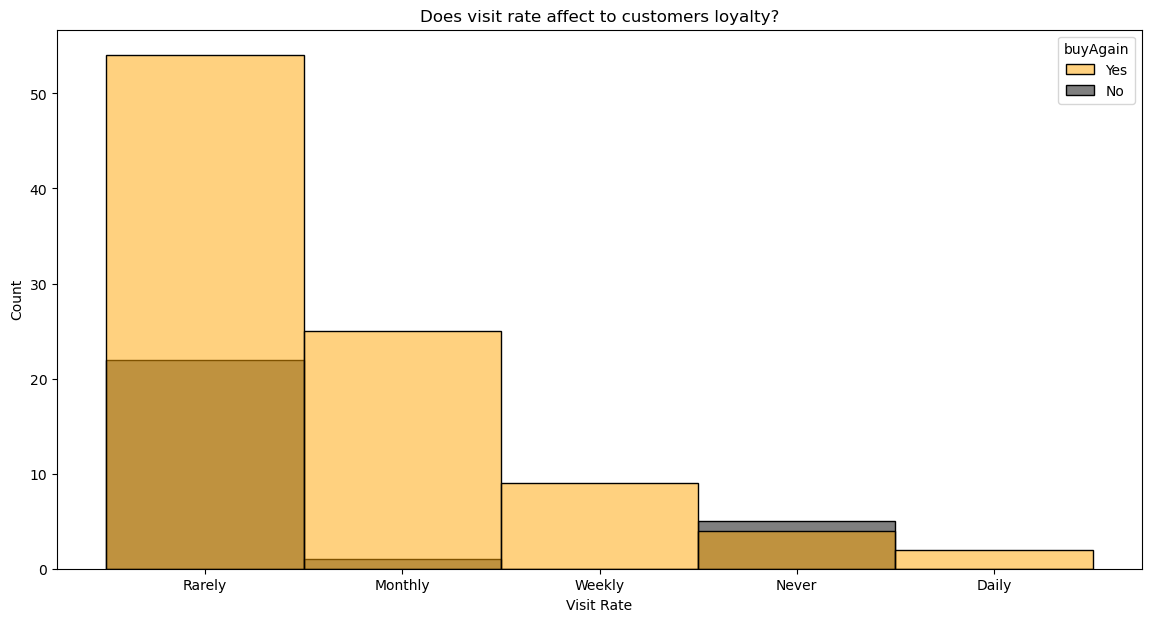

In [8]:
plt.figure(figsize=(14,7))

colors = ["#FFA500", "#000000"]

sns.histplot(data=sb_data, x='visit', hue='buyAgain', palette=colors, alpha=0.5)

plt.title("Does visit rate affect to customers loyalty?")
plt.xlabel("Visit Rate")
plt.ylabel("Count")

plt.show()

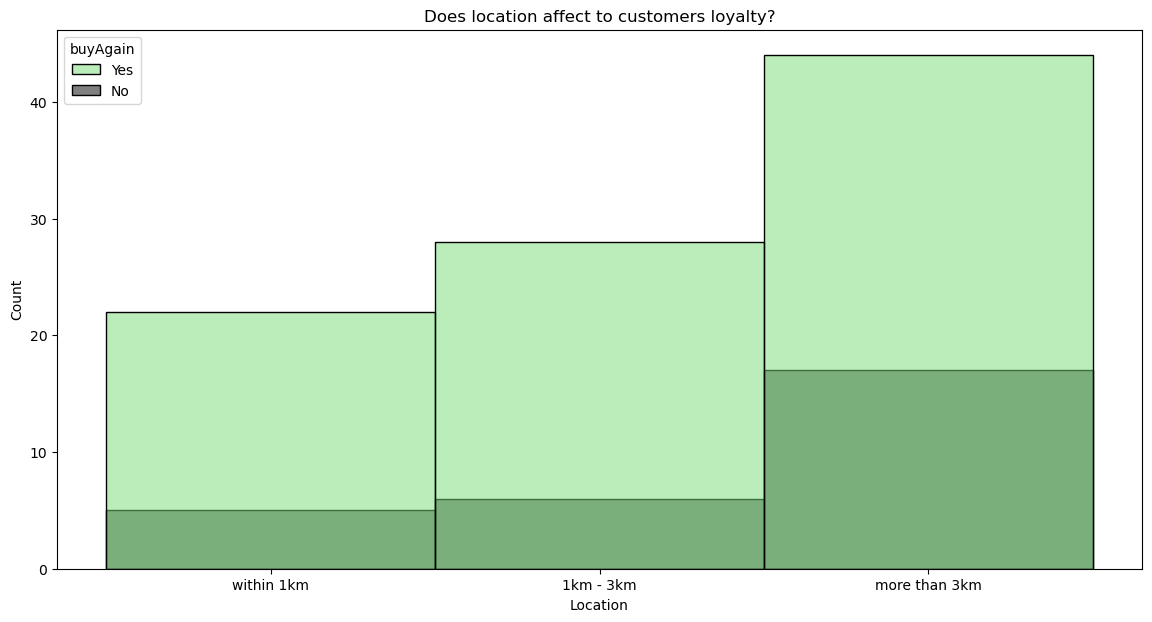

In [9]:
plt.figure(figsize=(14,7))

colors = ["#77DD77", "#000000"]

sns.histplot(data=sb_data, x='location', hue='buyAgain', palette=colors, alpha=0.5)

plt.title("Does location affect to customers loyalty?")
plt.xlabel("Location")
plt.ylabel("Count")

plt.show()

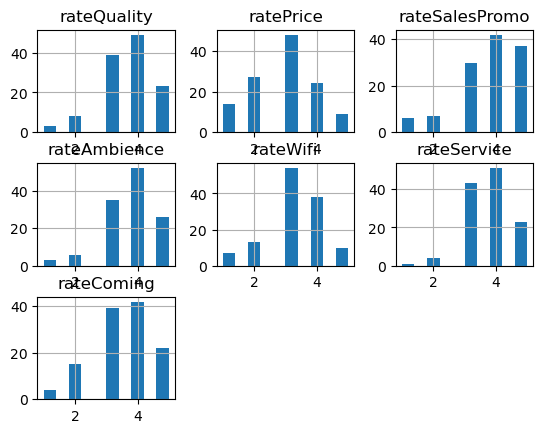

In [10]:
sb_data.hist();

<AxesSubplot:xlabel='buyAgain', ylabel='income'>

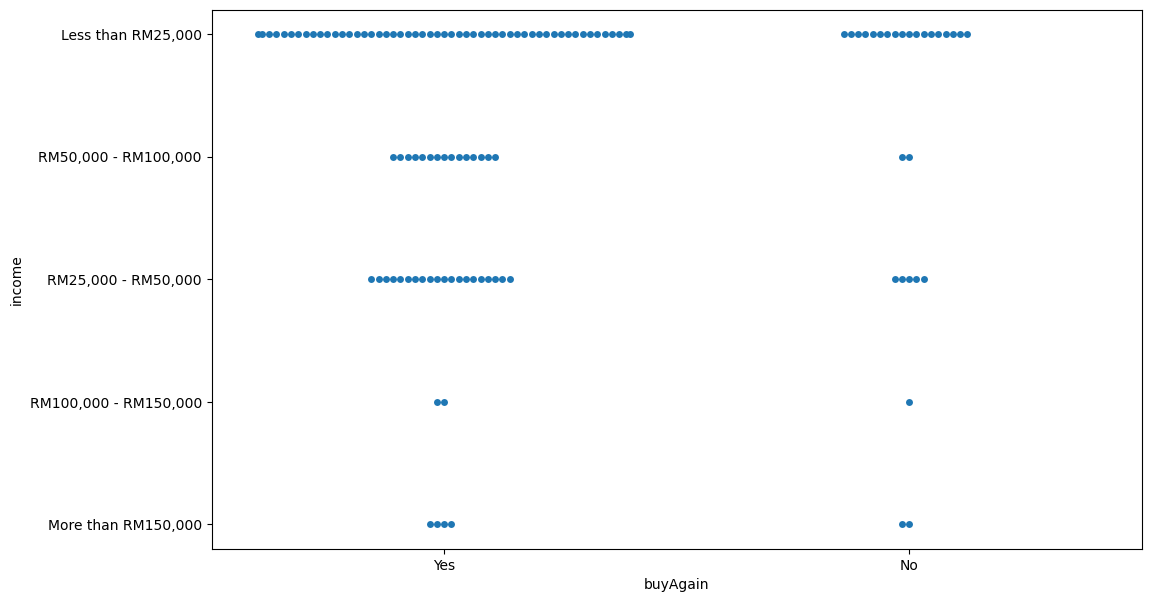

In [11]:
plt.figure(figsize=(12,7))
sns.swarmplot(x=sb_data['buyAgain'],
              y=sb_data['income'])

<AxesSubplot:xlabel='buyAgain', ylabel='location'>

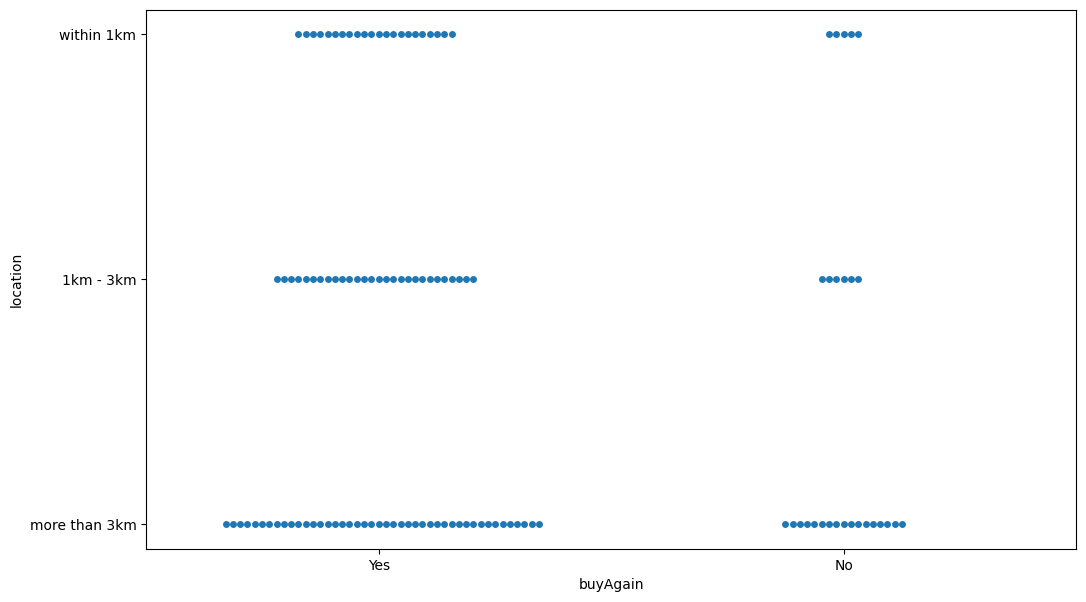

In [12]:
plt.figure(figsize=(12,7))
sns.swarmplot(x=sb_data['buyAgain'],
              y=sb_data['location'])

<AxesSubplot:xlabel='buyAgain', ylabel='visit'>

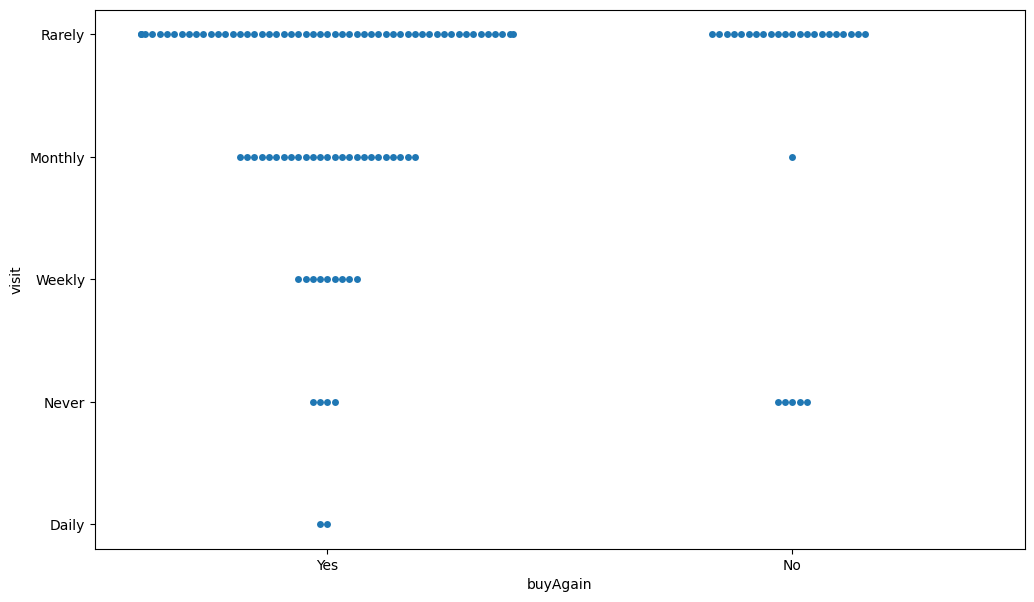

In [13]:
plt.figure(figsize=(12,7))
sns.swarmplot(x=sb_data['buyAgain'],
              y=sb_data['visit'])